## Read Data into Dataframe and Import Required Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Read in the data
data = pd.read_csv('loan\\loan.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\Garv_Daga\AppData\Local\Temp\ipykernel_28092\2987418060.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan\\loan.csv')


(39717, 111)

# 1. Data Cleaining

## Step 1 - Removing Unwanted Rows and Columns 
* Check Non Null Data in All Columns

In [94]:
data.notnull().sum().sort_values()

verification_status_joint             0
bc_util                               0
bc_open_to_buy                        0
avg_cur_bal                           0
acc_open_past_24mths                  0
inq_last_12m                          0
total_cu_tl                           0
inq_fi                                0
total_rev_hi_lim                      0
all_util                              0
max_bal_bc                            0
mo_sin_old_il_acct                    0
open_rv_24m                           0
il_util                               0
total_bal_il                          0
mths_since_rcnt_il                    0
open_il_24m                           0
open_il_12m                           0
open_il_6m                            0
open_acc_6m                           0
tot_cur_bal                           0
tot_coll_amt                          0
total_bc_limit                        0
open_rv_12m                           0
mo_sin_old_rev_tl_op                  0


* Drop All Columns with All Missing Values

In [95]:
data = data.dropna(axis=1, how='all')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

* Check Types of Loan Status

In [96]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

* Drop Current loan , as it is not be required for our analysis 

In [97]:
data = data[data['loan_status'] != 'Current']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

In [98]:
data.notnull().sum().sort_values()

next_pymnt_d                      0
mths_since_last_record         2740
mths_since_last_delinq        13672
desc                          26048
emp_title                     36191
emp_length                    37544
pub_rec_bankruptcies          37880
last_pymnt_d                  38506
chargeoff_within_12_mths      38521
collections_12_mths_ex_med    38521
revol_util                    38527
tax_liens                     38538
title                         38566
last_credit_pull_d            38575
home_ownership                38577
out_prncp_inv                 38577
total_pymnt                   38577
total_pymnt_inv               38577
total_rec_prncp               38577
total_rec_int                 38577
total_rec_late_fee            38577
recoveries                    38577
collection_recovery_fee       38577
last_pymnt_amnt               38577
out_prncp                     38577
funded_amnt                   38577
loan_amnt                     38577
policy_code                 

* Remove Columns
    1. id - loan id will not affect analysis as it is unique
    2. next_pymnt_d - all null after removing current 
    3. pymnt_plan - only n as value
    4. url -> Not required for analysis
    5. initial_list_status - Only has one value f
    6. collections_12_mths_ex_med - only 0 and NA
    7. policy_code - Only has 1 for every row
    8. application_type - only has INDIVIDUAL
    9. acc_now_delinq - Only has 0
    10. chargeoff_within_12_mths - Only has 0 and NA
    11. delinq_amnt - Only has 0
    12. tax_liens - Only 0 and NA
    13. mths_since_last_record - a lot of na

In [99]:
data = data.drop(['id', 'next_pymnt_d', 'pymnt_plan', 'url', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','out_prncp','out_prncp_inv','mths_since_last_record'], axis=1)
data.notnull().sum().sort_values()

mths_since_last_delinq     13672
desc                       26048
emp_title                  36191
emp_length                 37544
pub_rec_bankruptcies       37880
last_pymnt_d               38506
revol_util                 38527
title                      38566
last_credit_pull_d         38575
open_acc                   38577
pub_rec                    38577
revol_bal                  38577
total_pymnt                38577
inq_last_6mths             38577
total_pymnt_inv            38577
total_rec_prncp            38577
total_rec_int              38577
total_rec_late_fee         38577
recoveries                 38577
collection_recovery_fee    38577
last_pymnt_amnt            38577
total_acc                  38577
earliest_cr_line           38577
member_id                  38577
dti                        38577
loan_amnt                  38577
funded_amnt                38577
funded_amnt_inv            38577
term                       38577
int_rate                   38577
installmen

* Drop Columns which require much more processing 
 1. 'desc', emp_title' and 'title' to bring out insights - They will not be required for this EDA
 2. Some Columns dont add much importance to our problem statement - 'last_pymnt_d', 'earliest_cr_line','total_rec_int', total_rec_late_fee' and 'total_rec_prncp'

In [100]:
data = data.drop(['desc', 'emp_title','title'], axis=1)
#data = data.drop(['last_pymnt_d', 'earliest_cr_line', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               37544 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status              38

* Check If there is a member having more than one loan

In [101]:
data['member_id'].value_counts().head(5)

member_id
1296599    1
723395     1
719001     1
723527     1
723494     1
Name: count, dtype: int64

*  As there are no members having more than one loan - member_id is unique . this column can be removed.

In [102]:
data.drop(['member_id'], axis=1, inplace=True)

In [103]:
data.notnull().sum().sort_values()

mths_since_last_delinq     13672
emp_length                 37544
pub_rec_bankruptcies       37880
last_pymnt_d               38506
revol_util                 38527
last_credit_pull_d         38575
total_rec_int              38577
total_rec_prncp            38577
recoveries                 38577
inq_last_6mths             38577
total_pymnt                38577
total_acc                  38577
collection_recovery_fee    38577
revol_bal                  38577
pub_rec                    38577
open_acc                   38577
last_pymnt_amnt            38577
total_rec_late_fee         38577
total_pymnt_inv            38577
loan_amnt                  38577
dti                        38577
funded_amnt                38577
funded_amnt_inv            38577
term                       38577
int_rate                   38577
installment                38577
grade                      38577
sub_grade                  38577
home_ownership             38577
annual_inc                 38577
verificati

* Check mths_since_last_delinq

In [104]:
data['mths_since_last_delinq'].describe()

count    13672.000000
mean        35.882534
std         22.028093
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

   - As the Number of non null rows are quile less less than 36% and the data is numerical , Imputing it with mean and will make the property baised . So we are dropping it.

In [105]:
data.drop(['mths_since_last_delinq'], axis=1, inplace=True)
data.notnull().sum().sort_values()

emp_length                 37544
pub_rec_bankruptcies       37880
last_pymnt_d               38506
revol_util                 38527
last_credit_pull_d         38575
total_rec_late_fee         38577
total_rec_int              38577
total_rec_prncp            38577
collection_recovery_fee    38577
earliest_cr_line           38577
total_pymnt                38577
total_acc                  38577
last_pymnt_amnt            38577
revol_bal                  38577
pub_rec                    38577
open_acc                   38577
inq_last_6mths             38577
recoveries                 38577
total_pymnt_inv            38577
loan_amnt                  38577
addr_state                 38577
funded_amnt                38577
funded_amnt_inv            38577
term                       38577
int_rate                   38577
installment                38577
grade                      38577
dti                        38577
sub_grade                  38577
annual_inc                 38577
verificati

   - As the Number of null rows are quile less for all of the columns having null value , we are dropping the rows instead of inputing the values.

In [106]:
data.dropna(subset=['pub_rec_bankruptcies','last_pymnt_d','revol_util','last_credit_pull_d','emp_length'], axis=0, inplace=True)
data.notnull().sum().sort_values()

loan_amnt                  36737
inq_last_6mths             36737
open_acc                   36737
pub_rec                    36737
revol_bal                  36737
revol_util                 36737
total_acc                  36737
total_pymnt                36737
total_pymnt_inv            36737
total_rec_prncp            36737
total_rec_int              36737
total_rec_late_fee         36737
recoveries                 36737
collection_recovery_fee    36737
last_pymnt_d               36737
last_pymnt_amnt            36737
earliest_cr_line           36737
last_credit_pull_d         36737
delinq_2yrs                36737
addr_state                 36737
funded_amnt                36737
funded_amnt_inv            36737
term                       36737
int_rate                   36737
installment                36737
grade                      36737
sub_grade                  36737
emp_length                 36737
home_ownership             36737
annual_inc                 36737
verificati

## Step 2 - Fixing Column Values and Data Types

In [107]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                      2
int_rate                336
grade                     7
sub_grade                35
emp_length               11
home_ownership            4
verification_status       3
issue_d                  52
loan_status               2
purpose                  14
zip_code                808
addr_state               49
earliest_cr_line        513
revol_util             1086
last_pymnt_d             97
last_credit_pull_d       97
dtype: int64

* Convert columns having % object to float

In [108]:
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')
data['revol_util'] = data['revol_util'].str.rstrip('%').astype('float')
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           4
verification_status      3
issue_d                 52
loan_status              2
purpose                 14
zip_code               808
addr_state              49
earliest_cr_line       513
last_pymnt_d            97
last_credit_pull_d      97
dtype: int64

* Note we are not converting term to numerical as the data has only two possible values and is catagorical.

# 2. Derived Metrics

* Coverting dates to Month and Year will help in analysis

In [110]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['issue_d_month'] = pd.to_datetime(data['issue_d'], format='%b-%y').dt.month
data['issue_d_year'] = pd.to_datetime(data['issue_d'], format='%b-%y').dt.year
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['last_pymnt_d_month'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y').dt.month
data['last_pymnt_d_year'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y').dt.year
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.0,12,2011,1,2015
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.0,12,2011,4,2013
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.0,12,2011,6,2014
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.0,12,2011,1,2015
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,Jan-16,0.0,12,2011,1,2015


* % of Amount funded by Investor to the Amount Asked by Borrower

In [118]:
data['funded_amnt_%'] = data['funded_amnt_inv']/data['funded_amnt'] *100
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,funded_amnt_%
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,0.0,12,2011,1,2015,99.5
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,0.0,12,2011,4,2013,100.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,0.0,12,2011,6,2014,100.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,0.0,12,2011,1,2015,100.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,Jan-16,0.0,12,2011,1,2015,100.0


# 3. Univariate Analysis

In [ ]:
badLoans = data[data['loan_status'] == 'Charged Off']
badLoans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5.203000e+03,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,12296.290602,11927.931001,11238.939370,13.925681,339.556196,6.340771e+04,14.054405,0.166442,1.048241,9.263694,0.082837,13722.716510,55.990680,21.652700,6995.987426,6633.421874,4036.585016,2267.509329,4.327747,687.565293,88.229706,332.271347,0.064002
std,8096.922633,7758.154610,7636.294052,3.656808,215.830052,4.789325e+04,6.550470,0.527568,1.143063,4.508103,0.282549,15164.041028,27.806977,11.458326,6669.806664,6544.168275,3986.415077,2582.526481,12.822218,1748.898107,390.930984,542.537024,0.246345
min,1000.000000,1000.000000,0.000000,5.420000,22.790000,4.080000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,11.230000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,6000.000000,6000.000000,5000.000000,11.490000,172.380000,3.840000e+04,9.180000,0.000000,0.000000,6.000000,0.000000,4178.500000,35.000000,13.000000,2324.915000,2074.160000,1253.835000,598.205000,0.000000,9.765000,0.000000,120.605000,0.000000
50%,10000.000000,10000.000000,9825.000000,13.790000,297.530000,5.400000e+04,14.350000,0.000000,1.000000,9.000000,0.000000,9480.000000,59.200000,20.000000,4963.500000,4616.800000,2780.280000,1344.610000,0.000000,182.760000,2.605600,243.380000,0.000000
75%,17000.000000,16000.000000,15395.546045,16.450000,460.100000,7.500000e+04,19.290000,0.000000,2.000000,12.000000,0.000000,17731.500000,79.200000,29.000000,9404.720000,8939.245000,5383.655000,2902.810000,0.000000,613.175000,9.705000,409.585000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,1.250000e+06,29.850000,8.000000,8.000000,38.000000,2.000000,147365.000000,99.900000,74.000000,51745.450000,51671.580000,31115.810000,22122.300000,180.200000,29623.350000,7002.190000,12818.380000,2.000000


In [ ]:
goodoans = data[data['loan_status'] == 'Fully Paid']
goodoans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,3.153400e+04,31534.000000,31534.00000,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,31534.000000,31534.0,31534.0,31534.000000,31534.000000
mean,10964.766601,10711.919674,10313.027321,11.659557,322.590782,7.046703e+04,13.218524,0.14264,0.839443,9.312615,0.049344,13328.536881,47.837262,22.246591,12848.986209,12354.553293,10711.913100,2136.225244,0.847972,0.0,0.0,3207.171718,0.038054
std,7223.862728,6979.196501,6890.418690,3.609064,207.567945,6.630023e+04,6.658331,0.48510,1.051705,4.353902,0.226325,15966.892534,28.230103,11.396330,8890.670944,8751.878455,6979.190835,2382.326368,5.623620,0.0,0.0,4771.664171,0.191827
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,578.768140,0.000000,500.000000,6.220000,0.000000,0.0,0.0,0.160000,0.000000
25%,5500.000000,5325.000000,5000.000000,8.590000,167.080000,4.200000e+04,8.070000,0.00000,0.000000,6.000000,0.000000,3666.250000,24.300000,14.000000,6228.985995,5934.800000,5325.000000,670.280000,0.000000,0.0,0.0,261.937500,0.000000
50%,9600.000000,9500.000000,8971.841303,11.490000,278.150000,6.000000e+04,13.260000,0.00000,1.000000,9.000000,0.000000,8798.500000,48.000000,21.000000,10811.721125,10276.435000,9500.000000,1326.185000,0.000000,0.0,0.0,894.125000,0.000000
75%,15000.000000,14893.750000,14000.000000,13.990000,424.552500,8.499600e+04,18.450000,0.00000,1.000000,12.000000,0.000000,16912.000000,71.100000,29.000000,17152.032157,16514.135000,14893.742500,2689.812500,0.000000,0.0,0.0,4334.977500,0.000000
max,35000.000000,35000.000000,35000.000000,24.110000,1295.210000,6.000000e+06,29.990000,11.00000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,165.690000,0.0,0.0,36115.200000,2.000000


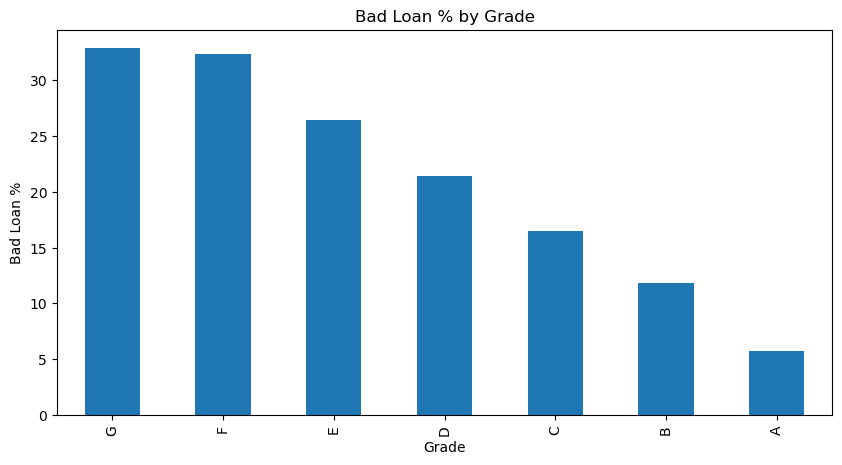

In [127]:
badLoans = data[data['loan_status'] == 'Charged Off']
grade = round(badLoans['grade'].value_counts()/data['grade'].value_counts()*100, 2).sort_values(ascending=False)
grade.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Grade')
plt.ylabel('Bad Loan %')
plt.title('Bad Loan % by Grade')
plt.show()

**The Risk increases with the increase of Grade .**

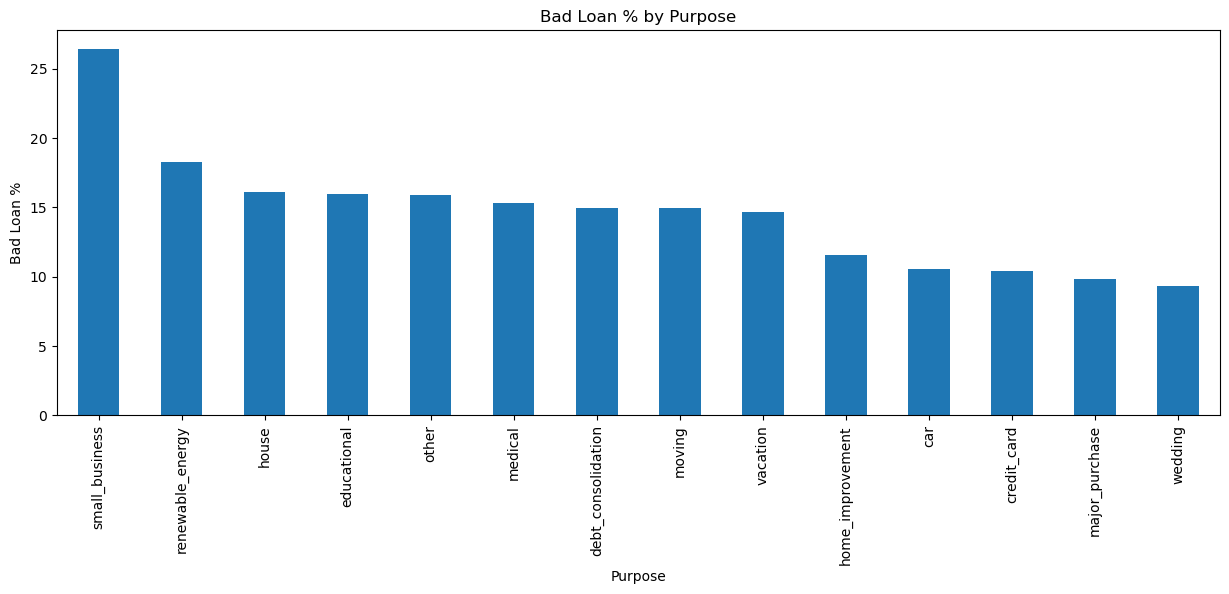

In [126]:
badloan_percent = round(badLoans['purpose'].value_counts()/data['purpose'].value_counts()*100, 2).sort_values(ascending=False)
#Plot the above badloan_percent as hist plot
badloan_percent.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Purpose')
plt.ylabel('Bad Loan %')
plt.title('Bad Loan % by Purpose')
plt.show()

**We can say that the chances of bad loans is the most for small business .**